# **ML-Assignment 1 - Statistical Measures**

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing


# **1. Introduction**
The real estate market in Bangalore is growing rapidly, with fluctuating property prices depending on various factors such as location, size, and amenities. In this project, we analyze property prices per square foot in Bangalore to identify patterns, detect outliers, and assess relationships between key variables. By understanding the data, we can make better pricing decisions, improve property valuation, and ensure accurate predictions.

# **2. Goal of the Project**
The primary objectives of this project are:
1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Detect outliers using different statistical methods and apply suitable removal techniques.
3. Compare outlier removal methods using box plots.
4. Analyze the distribution of price per square foot and apply transformations if necessary.
5. Study correlations between numerical variables using a heatmap.
6. Use scatter plots to visualize relationships between key variables.

This analysis will help in better real estate decision-making and pricing strategies.

# **3. Data Story**
The dataset consists of property prices in Bangalore with details such as total square footage, location, price per square foot, number of bathrooms, and more.

🔹 Key Features in the Dataset:

1.Total_sqft – Total area of the property in square feet.
2.Price_per_sqft – Price per square foot, the main variable of interest.
3.Location – Geographic location of the property.
4.Size – Number of bedrooms in the property.
5.Bath – Number of bathrooms in the property.
Our primary focus is on analyzing price per square foot and identifying any inconsistencies, trends, and outliers affecting pricing.



# **4. Data Preprocessing**

**1.Importing Libraries**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore


**2. Load the dataset**

In [54]:
df = pd.read_csv("house_price (1).csv")

**3.Understand the data structure**

In [55]:
df.shape

(13200, 7)

In [56]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [57]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [58]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


**4.Perform Basic Exploratory Data Analysis (EDA)**

In [60]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [80]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [61]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [83]:
print(df.describe(include=['object']))


       location   size
count     12151  12151
unique      241     31
top       other  2 BHK
freq       2659   4676


In [62]:
df['location'].nunique(), df['size'].unique()


(241,
 array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
        '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
        '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
        '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
        '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
        '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object))

In [63]:
df['size'] = df['size'].replace('Bedroom', 'BHK')
df['location'].nunique(), df['size'].unique()


(241,
 array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
        '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
        '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
        '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
        '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
        '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object))

In [64]:
df.duplicated().sum()


1049

In [65]:
df.drop_duplicates(inplace=True)


In [66]:
df.shape

(12151, 7)

**Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)**

In [67]:
df[['total_sqft','bath','price','bhk','price_per_sqft']].skew()

total_sqft         15.112123
bath                4.214944
price               7.915103
bhk                 4.838129
price_per_sqft    103.902032
dtype: float64

 **a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method**

In [74]:
def mean_met(data,column):
    for col in column:
        df_mean=data.copy()
        mean = df_mean[col].mean()
        std = df_mean[col].std()

        upper_bound = mean + (3 * std)
        lower_bound = mean - (3 * std)

        filter_outliers_std = df_mean[(df_mean[col] <= upper_bound) & (df_mean[col] >= lower_bound)]
    return filter_outliers_std


In [118]:
# df_mean = mean_met(df, ['total_sqft'])
df_mean = mean_met(df_mean,['price_per_sqft'])

In [119]:
df_mean.head()
print("Dataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_mean.shape)

Dataset shape before outlier removal: (12151, 7)
Dataset shape after outlier removal: (12040, 7)


In [120]:
df_mean[['total_sqft','bath','price','bhk','price_per_sqft']].skew()

total_sqft         2.011008
bath               3.999605
price              4.839186
bhk                4.631809
price_per_sqft    10.974658
dtype: float64

**b)Percentile method**

In [111]:
def remove_outliers_percentile(data, column):
    df_percentile = df.copy()
    for col in column:
        lower_bound = df_percentile[col].quantile(0.05)
        upper_bound = df_percentile[col].quantile(0.95)
        df_percentile = df_percentile[(df_percentile[col] >= lower_bound) & (df_percentile[col] <= upper_bound)]
    return df_percentile

In [112]:
df_cleaned_percentile = remove_outliers_percentile(df, ['price_per_sqft'])
# df_cleaned_percentile = remove_outliers_percentile(df_cleaned_percentile, ['total_sqft'])

In [113]:
df_cleaned_percentile.head()
df_mean.head()
print("Dataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned_percentile.shape)

Dataset shape before outlier removal: (12151, 7)
Dataset shape after outlier removal: (10940, 7)


In [114]:
df_cleaned_percentile[['total_sqft','bath','price','bhk','price_per_sqft']].skew()

total_sqft        8.046333
bath              2.382540
price             4.861568
bhk               2.306045
price_per_sqft    1.491019
dtype: float64

**c) IQR(Inter quartile range method)**

In [91]:
def remove_outliers_iqr(data, column):
    df_iqr = data.copy()
    for col in column:
        Q1 = df_iqr[col].quantile(0.25)
        Q3 = df_iqr[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]
    return df_iqr

In [108]:
df_cleaned_iqr = remove_outliers_iqr(df, ['price_per_sqft'])

In [94]:
df_cleaned_percentile.head()
df_mean.head()
print("Dataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned_iqr.shape)

Dataset shape before outlier removal: (12151, 7)
Dataset shape after outlier removal: (11009, 7)


**d) Z Score method**

In [125]:
def remove_outliers_zscore(data, column):
    df_zscore = data.copy()
    for col in column:
        z_scores = zscore(df_zscore[col])
        df_zscore = df_zscore[abs(z_scores) <= 3]
    return df_zscore

In [126]:
df_cleaned_zscore = remove_outliers_zscore(df, ['price_per_sqft'])


In [127]:
df_cleaned_percentile.head()
df_mean.head()
print("Dataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned_zscore.shape)

Dataset shape before outlier removal: (12151, 7)
Dataset shape after outlier removal: (12146, 7)


## Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

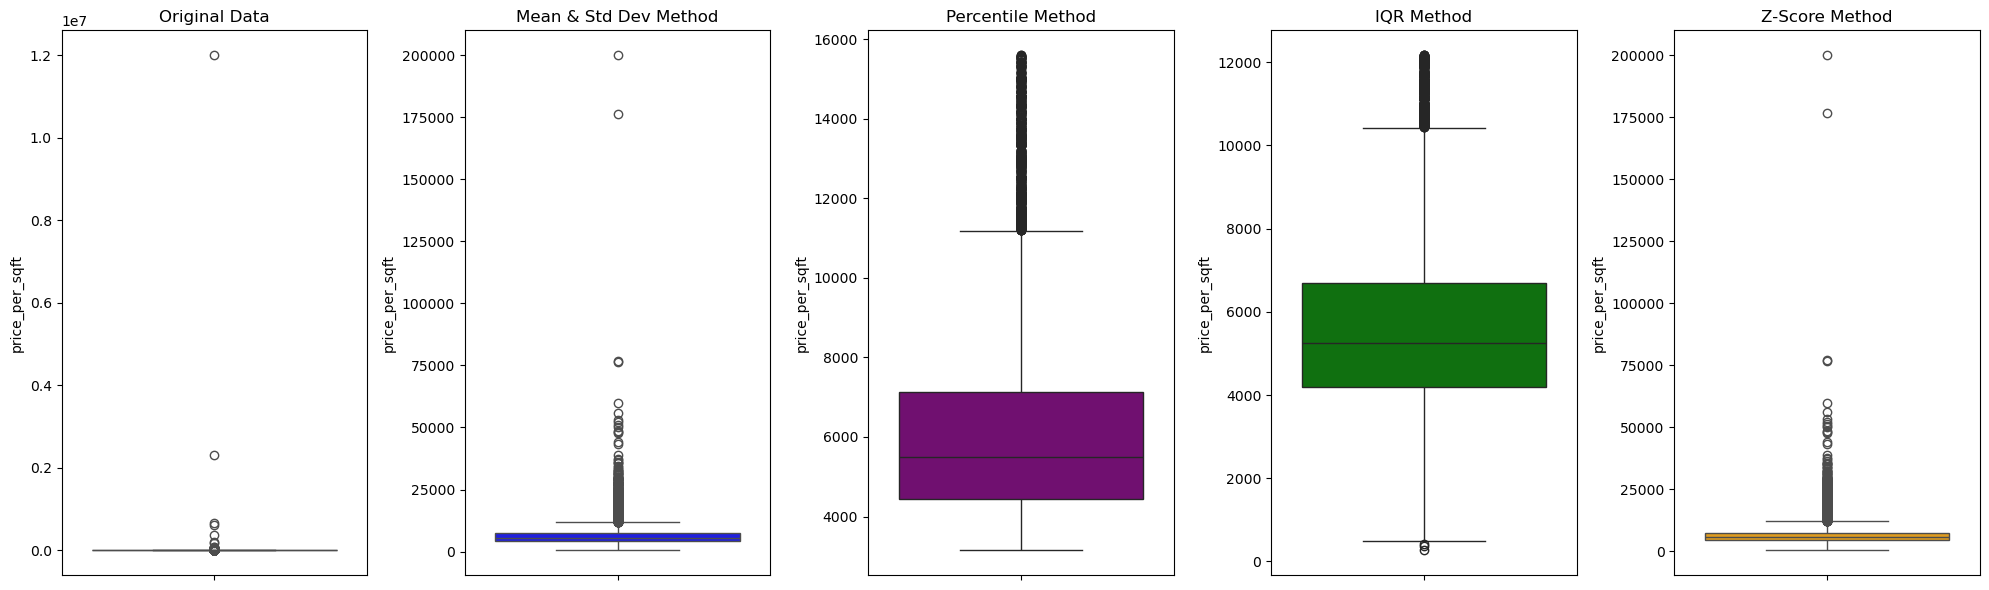

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Original Data
sns.boxplot(y=df['price_per_sqft'], ax=axes[0], color='red')
axes[0].set_title("Original Data")

# Mean & Standard Deviation Method
sns.boxplot(y=df_mean['price_per_sqft'], ax=axes[1], color='blue')
axes[1].set_title("Mean & Std Dev Method")

# Percentile Method
sns.boxplot(y=df_cleaned_percentile['price_per_sqft'], ax=axes[2], color='purple')
axes[2].set_title("Percentile Method")

# IQR Method
sns.boxplot(y=df_cleaned_iqr['price_per_sqft'], ax=axes[3], color='green')
axes[3].set_title("IQR Method")

# Z-Score Method
sns.boxplot(y=df_cleaned_zscore['price_per_sqft'], ax=axes[4], color='orange')
axes[4].set_title("Z-Score Method")

# Adjust layout
plt.tight_layout()
plt.show()


 Interpretation:
 
- Original Data: Shows extreme outliers.
- Mean & Std Dev Method: Removes some extreme values but not all.
- Percentile Method: Removes the top and bottom 5%, potentially losing valuable data.
- IQR Method: Balances outlier removal effectively.
- Z-Score Method: Works similar to Mean & Std Dev but still leaves some outliers.

Conclusion: IQR Method works best as it removes extreme outliers while retaining useful data. 

## Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

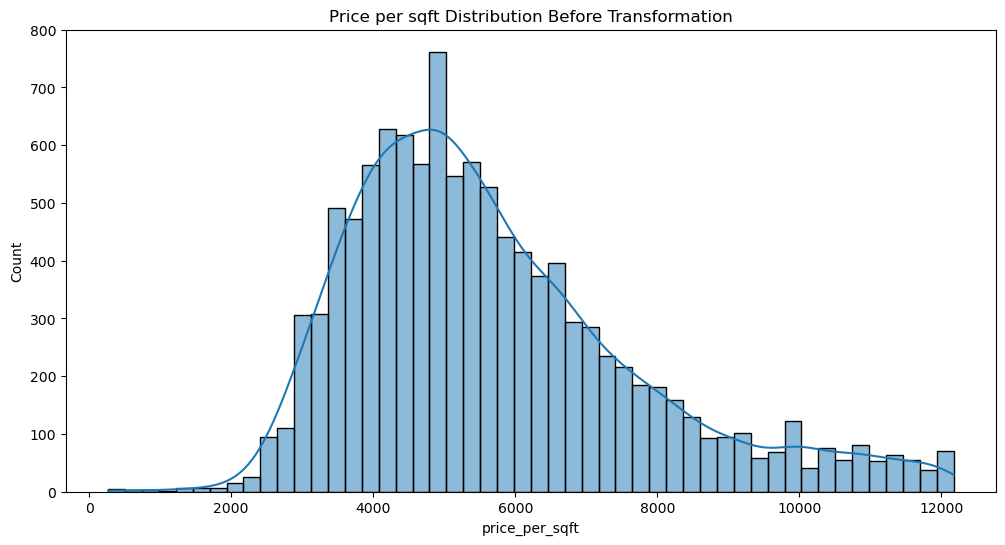

Skewness before transformation: 0.977839864547141
Kurtosis before transformation: 0.7166920949930122


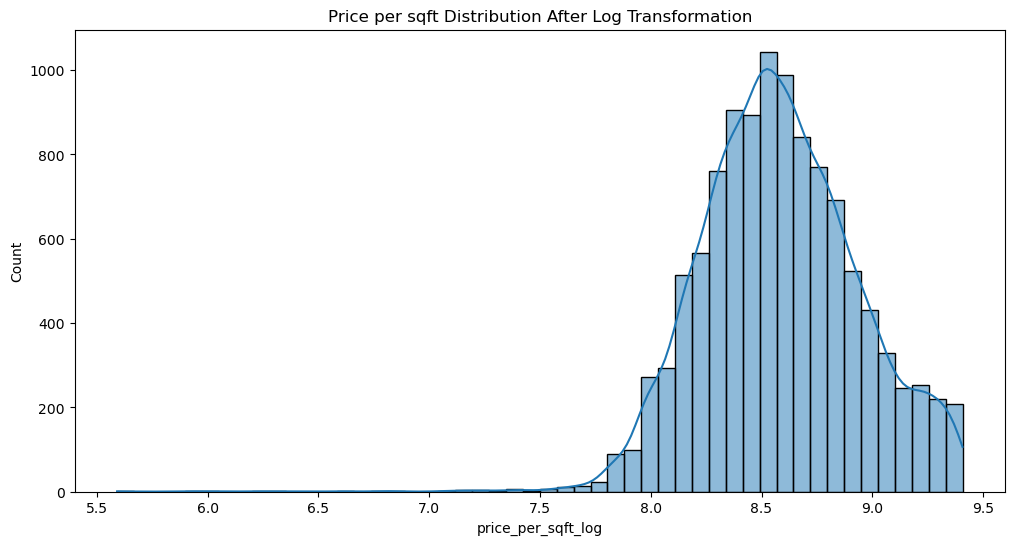

Skewness after transformation: -0.10682559752205917
Kurtosis after transformation: 1.3056824226795536


In [131]:
import scipy.stats as stats

plt.figure(figsize=(12,6))
sns.histplot(df_cleaned_iqr['price_per_sqft'], bins=50, kde=True)
plt.title("Price per sqft Distribution Before Transformation")
plt.show()

# Check skewness & kurtosis
print("Skewness before transformation:", df_cleaned_iqr['price_per_sqft'].skew())
print("Kurtosis before transformation:", df_cleaned_iqr['price_per_sqft'].kurtosis())

# Log transformation
df_cleaned_iqr['price_per_sqft_log'] = np.log1p(df_cleaned_iqr['price_per_sqft'])

plt.figure(figsize=(12,6))
sns.histplot(df_cleaned_iqr['price_per_sqft_log'], bins=50, kde=True)
plt.title("Price per sqft Distribution After Log Transformation")
plt.show()

# Check skewness & kurtosis again
print("Skewness after transformation:", df_cleaned_iqr['price_per_sqft_log'].skew())
print("Kurtosis after transformation:", df_cleaned_iqr['price_per_sqft_log'].kurtosis())


## Q5. Check the correlation between all the numerical columns and plot heatmap.

                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.386694  0.572516  0.339936       -0.008877
bath              0.386694  1.000000  0.448802  0.898875        0.030133
price             0.572516  0.448802  1.000000  0.390008        0.027415
bhk               0.339936  0.898875  0.390008  1.000000        0.030294
price_per_sqft   -0.008877  0.030133  0.027415  0.030294        1.000000


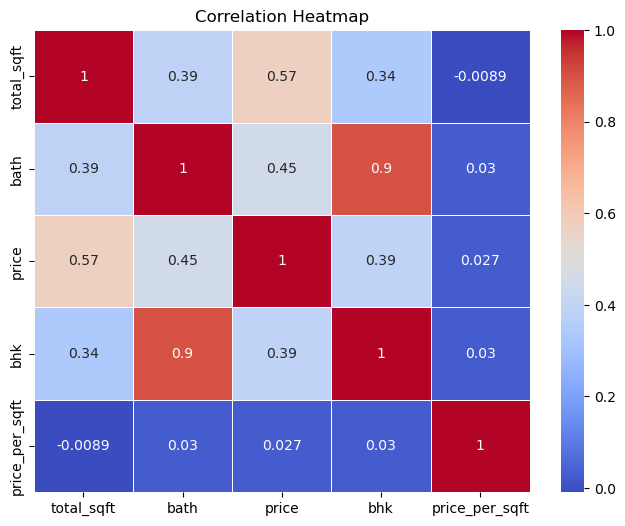

In [132]:
import seaborn as sns

corr_matrix = df[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']].corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Q6. Draw Scatter plot between the variables to check the correlation between them.

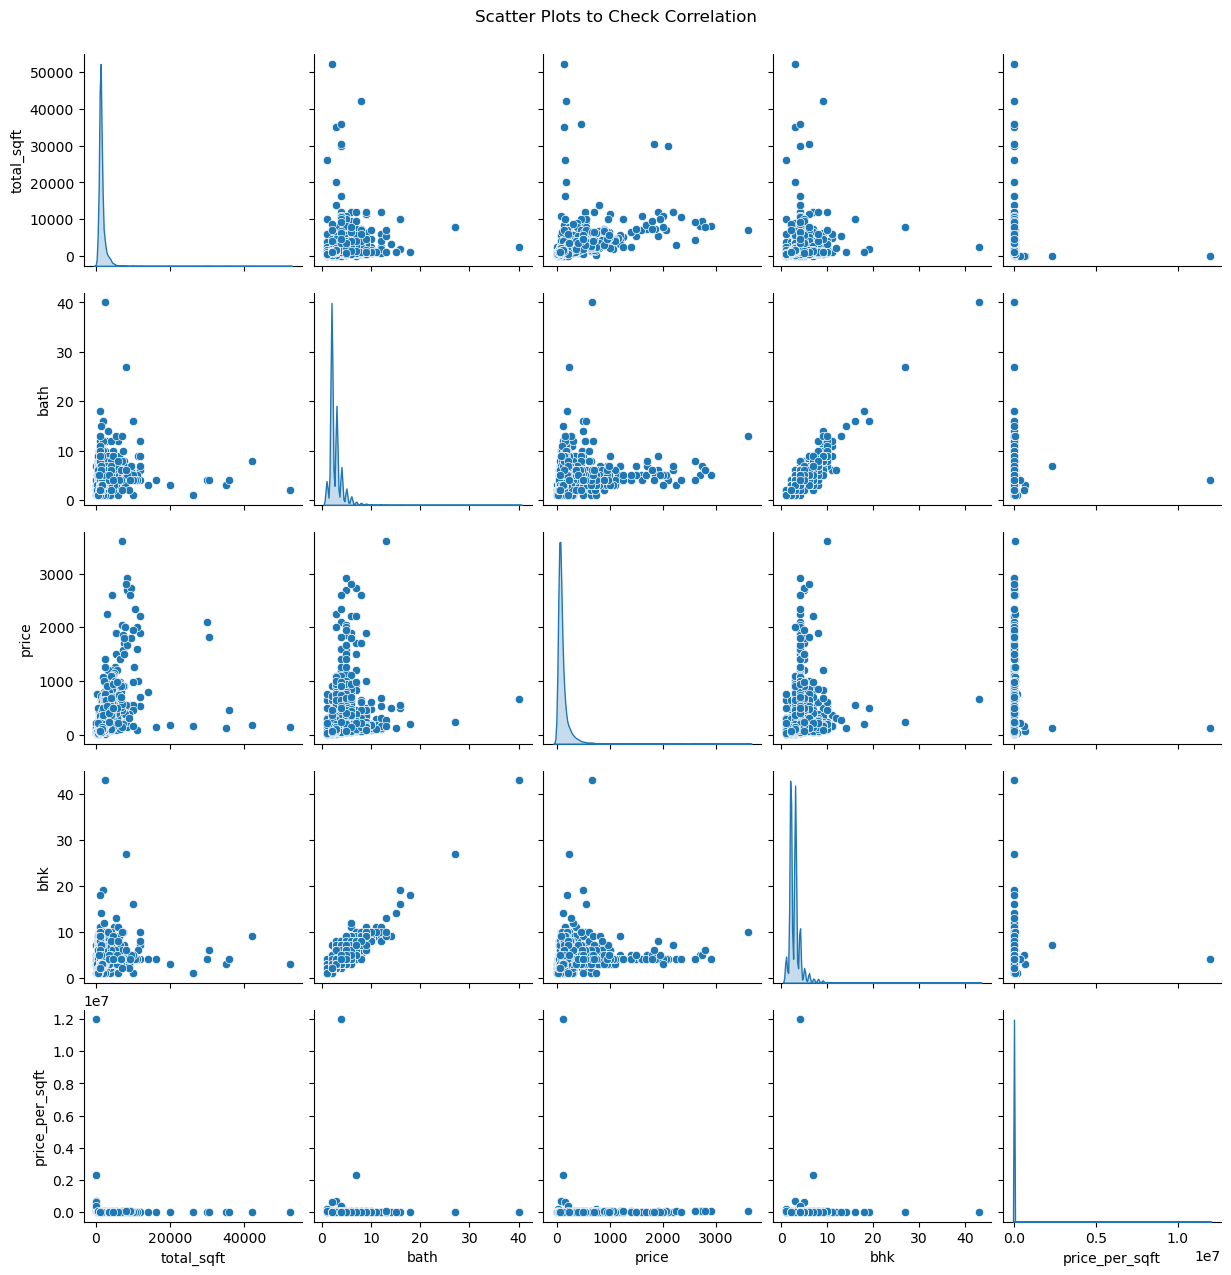

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
num_cols = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

# Create scatter plots for all pairs of numerical variables
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Scatter Plots to Check Correlation", y=1.02)
plt.show()
